# Investigate Regression Output
After running EBUS-Extraction to pull out the given upwelling system, I ran the climate-correlation.py script to correlate a near-offshore region of the EBUS with specific climate indices. This saves some CSV files with regression results that will now be interpreted here.

In [1]:
# Numerics
import numpy as np
import pandas as pd
import xarray as xr

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Functions

In [2]:
# Constants
EBUs = ['CalCS', 'HumCS', 'CanCS', 'BenCS']
EBU_Atlantic = ['CanCS', 'BenCS']
EBU_Pacific = ['CalCS', 'HumCS']
colors = {
    'CalCS': '#80b1d3',
    'HumCS': '#fb8072',
    'CanCS': '#fdb462',
    'BenCS': '#bc80bd'
}
ens = ['001', '002', '009', '010', '011',
       '012', '013', '014', '015', '016',
       '017', '018', '019', '020', '021',
       '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031',
       '032', '033', '034', '035', '101',
       '102', '103', '104', '105']

In [3]:
def setup_dataframes(EBU, df1, df2, df3, df4, df5):
    fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/' + EBU.lower() + '/'
    df1[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_enso_' + EBU)
    df1[EBU].index = ens
    df2[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_pdo_' + EBU)
    df2[EBU].index = ens
    df3[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_amo_' + EBU)
    df3[EBU].index = ens
    df4[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_nao_' + EBU)
    df4[EBU].index = ens
    df5[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_sam_' + EBU)
    df5[EBU].index = ens
    return df1, df2, df3, df4, df5

In [4]:
def remove_insignificant(df):
    df = df[df['P-Value'] < 0.05]
    return df

In [5]:
# Pull in regression output to dataframes
df_enso, df_pdo, df_amo, df_nao, df_sam = ({} for i in range(5))
for idx in EBUs:
    df_enso, df_pdo, df_amo, df_nao, df_sam = setup_dataframes(idx, df_enso, df_pdo, df_amo, df_nao, df_sam)

In [6]:
# Remove anything with p > 0.05
for ii in EBUs:
    df_enso[ii] = remove_insignificant(df_enso[ii])

In [7]:
df_enso['CalCS']

,Slope,R Value,R Squared,P-Value
001,0.039033,0.298265,0.088962,7.099123e-25
002,0.058100,0.331240,0.109720,1.275979e-30
009,0.028511,0.182068,0.033149,5.824366e-10
010,0.035446,0.220225,0.048499,5.341122e-14
012,0.045991,0.278354,0.077481,9.507694e-22
013,0.056148,0.329476,0.108555,2.701541e-30
014,0.048386,0.352918,0.124551,8.389599e-35
015,0.051301,0.286611,0.082146,5.150133e-23
016,0.037962,0.218509,0.047746,8.442237e-14
017,0.036237,0.266845,0.071206,4.704951e-20


In [10]:
def hist_plot(ax, data, climate_index, EBU, label):
    sns.distplot(data, kde=False, color=colors[EBU], norm_hist=False, bins=10, label=label)
    ax.set_title(climate_index + ' Correlation Distribution', size=25)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('R Value', size=20)
    plt.ylabel('Number of Simulations', size=20)
    plt.ylim([0, 14])
    plt.xlim([-1, 1])
    plt.plot([0, 0], [0, 14], linewidth=1, color='k')

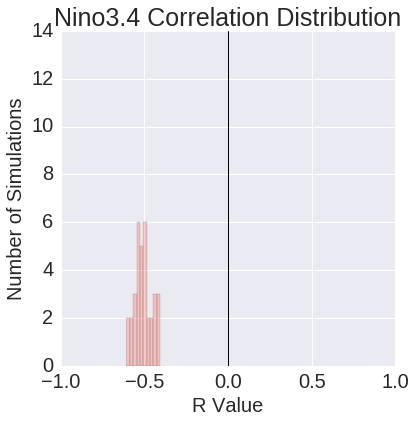

In [12]:
# 4-MONTH LAGGED HUMCS ENSO
fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/'
df_enso = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_enso_HumCS_lag4')
df_enso = remove_insignificant(df_enso)


sns.set_style('darkgrid')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
hist_plot(ax, df_enso['R Value'], 'Nino3.4', 'HumCS', 'HumCS')

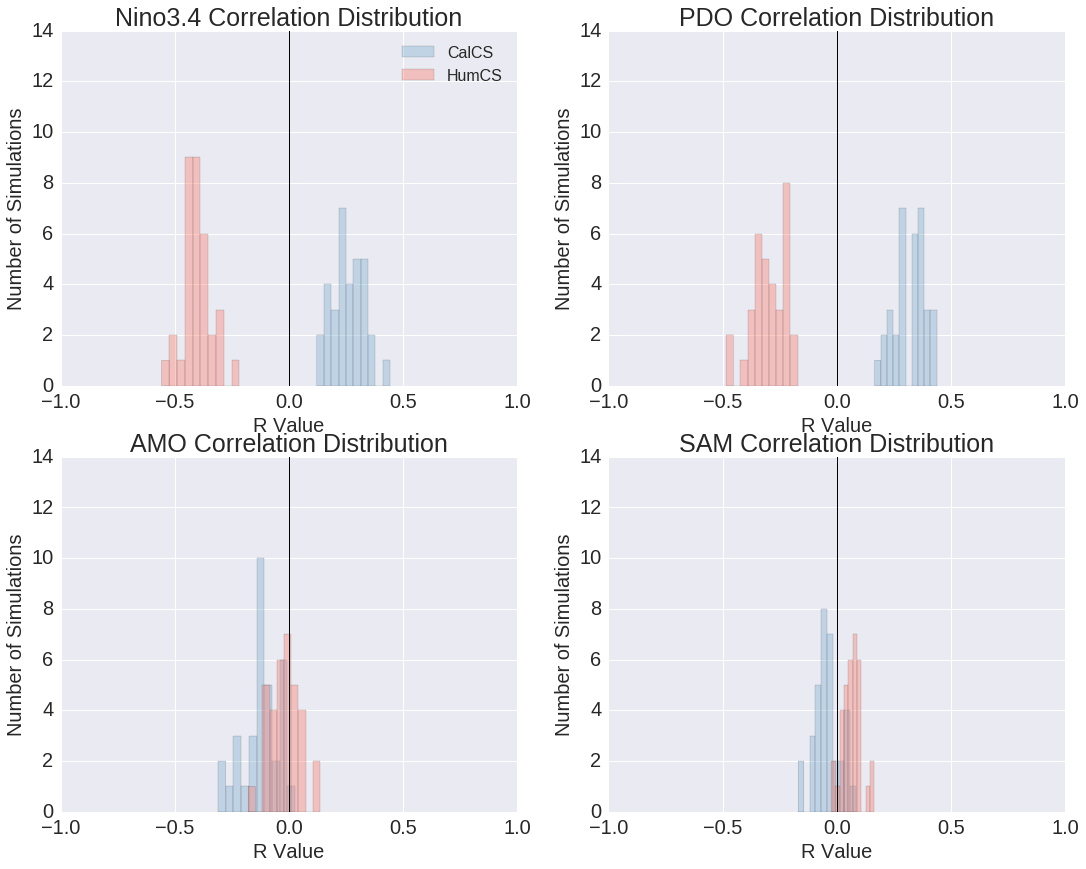

In [11]:
# PACIFIC SECTOR
sns.set_style('darkgrid')
fig = plt.figure(figsize=(18,14))
ax1 = fig.add_subplot(221)
for idx in EBU_Pacific:
    hist_plot(ax1, df_enso[idx]['R Value'], 'Nino3.4', idx, idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
ax2 = fig.add_subplot(222)
for idx in EBU_Pacific:
    hist_plot(ax2, df_pdo[idx]['R Value'], 'PDO', idx, idx)
ax3 = fig.add_subplot(223)
for idx in EBU_Pacific:
    hist_plot(ax3, df_amo[idx]['R Value'], 'AMO', idx, idx)
ax4 = fig.add_subplot(224)
for idx in EBU_Pacific:
    hist_plot(ax4, df_sam[idx]['R Value'], 'SAM', idx, idx)
    
#plt.savefig("pacific-EBU-correlation-distributions.png")

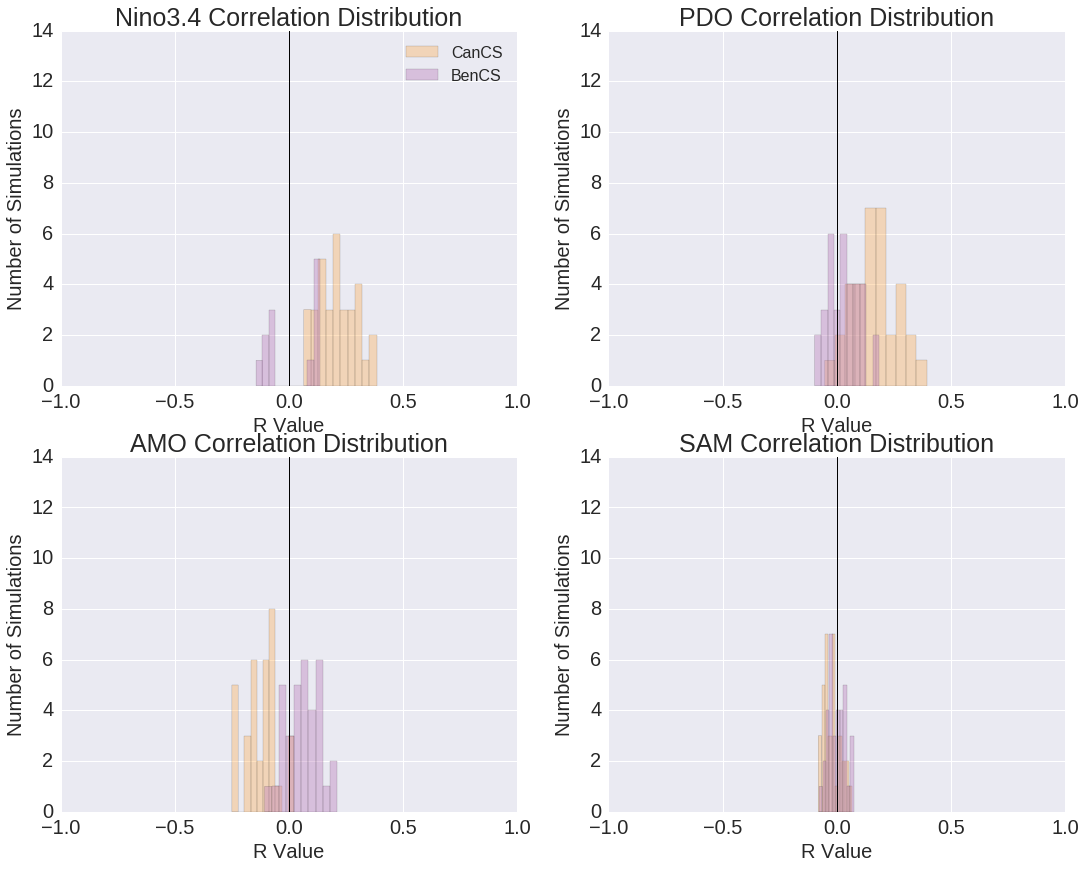

In [8]:
# ATLANTIC SECTOR
sns.set_style('darkgrid')
fig = plt.figure(figsize=(18,14))
ax1 = fig.add_subplot(221)
for idx in EBU_Atlantic:
    hist_plot(ax1, df_enso[idx]['R Value'], 'Nino3.4', idx, idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
ax2 = fig.add_subplot(222)
for idx in EBU_Atlantic:
    hist_plot(ax2, df_pdo[idx]['R Value'], 'PDO', idx, idx)
ax3 = fig.add_subplot(223)
for idx in EBU_Atlantic:
    hist_plot(ax3, df_amo[idx]['R Value'], 'AMO', idx, idx)
ax4 = fig.add_subplot(224)
for idx in EBU_Atlantic:
    hist_plot(ax4, df_sam[idx]['R Value'], 'SAM', idx, idx)
    
#plt.savefig("atlantic-EBU-correlation-distributions.png")

# Outputting to LaTeX

In [8]:
#df_amo['BenCS'] = df_amo['BenCS'].drop('P-Value', 1)
frames = [df_amo['CanCS'], df_amo['BenCS']]
result = pd.concat(frames, axis=1)
result.round(2)
print result.round(2).to_latex()

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  Slope &  R Value &  R Squared &  P-Value &  Slope &  R Value &  R Squared &  P-Value \\
\midrule
001 &  -0.08 &    -0.07 &       0.00 &     0.02 &   0.47 &     0.14 &       0.02 &     0.00 \\
002 &  -0.09 &    -0.06 &       0.00 &     0.05 &   0.71 &     0.17 &       0.03 &     0.00 \\
009 &  -0.14 &    -0.11 &       0.01 &     0.00 &  -0.10 &    -0.03 &       0.00 &     0.34 \\
010 &  -0.28 &    -0.24 &       0.06 &     0.00 &   0.23 &     0.07 &       0.00 &     0.02 \\
011 &  -0.19 &    -0.16 &       0.03 &     0.00 &   0.07 &     0.03 &       0.00 &     0.38 \\
012 &  -0.28 &    -0.24 &       0.06 &     0.00 &   0.66 &     0.20 &       0.04 &     0.00 \\
013 &  -0.13 &    -0.10 &       0.01 &     0.00 &   0.16 &     0.04 &       0.00 &     0.15 \\
014 &  -0.12 &    -0.10 &       0.01 &     0.00 &  -0.09 &    -0.03 &       0.00 &     0.32 \\
015 &  -0.08 &    -0.07 &       0.01 &     0.02 &  -0.16 &    -0.05 &       0.00 &     0.10 \\
016 & 

In [23]:
EBUS = "BenCS"
print "mean slope: " + str(np.mean(df_pdo[EBUS]['Slope'].values).round(2))
print "mean r: " + str(np.mean(df_pdo[EBUS]['R Value'].values).round(2))
print "mean r2: " + str(np.mean(df_pdo[EBUS]['R Squared'].values).round(2))
print "----------"
print "std slope: " + str(np.std(df_pdo[EBUS]['Slope'].values).round(2))
print "std r: " + str(np.std(df_pdo[EBUS]['R Value'].values).round(2))
print "std r2: " + str(np.std(df_pdo[EBUS]['R Squared'].values).round(2))

mean slope: 0.02
mean r: 0.03
mean r2: 0.01
----------
std slope: 0.03
std r: 0.07
std r2: 0.01
